In [2]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib widget

In [3]:
WESAD_PATH = "C:/Users/Abhijit/Desktop/PES1201801293/project/WESAD/"

In [4]:
subjects = [s for s in os.listdir(WESAD_PATH) if s.startswith("S")]
subjects.sort()
subjects

['S10',
 'S11',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9']

In [4]:
ORIG_FREQ = 700
def expand_data(data, max_size):

    data_sync = {}
    # copy chest from original
    data_sync['signal'] = {'chest': data['signal']['chest']}.copy()
    
    data_sync['signal']['wrist'] = {}
    # copy labels, subject from original
    data_sync['label'] = data['label']
    data_sync['subject'] = data['subject']
    
    # separate chest ACC into 3 components
    data_sync['signal']['chest']['ACC1'] = data_sync['signal']['chest']['ACC'][:, 0]
    data_sync['signal']['chest']['ACC2'] = data_sync['signal']['chest']['ACC'][:, 1]
    data_sync['signal']['chest']['ACC3'] = data_sync['signal']['chest']['ACC'][:, 2]
    del data_sync['signal']['chest']['ACC']

    # synchronise wrist by duplicating the data (NOT SURE IF THIS IS RIGHT)
    data_sync['signal']['wrist']['BVP'] = np.repeat(data['signal']['wrist']['BVP'], 700//64 + 1, axis=0)[:max_size]
    data_sync['signal']['wrist']['ACC'] = np.repeat(data['signal']['wrist']['ACC'], 700//32 + 1, axis=0)[:max_size]
    data_sync['signal']['wrist']['EDA'] = np.repeat(data['signal']['wrist']['EDA'], 700//4 + 1, axis=0)[:max_size]
    data_sync['signal']['wrist']['TEMP'] = np.repeat(data['signal']['wrist']['TEMP'], 700//4 + 1, axis=0)[:max_size]
    
    # separate ACC into 3 components
    data_sync['signal']['wrist']['ACC1'] = data_sync['signal']['wrist']['ACC'][:, 0]
    data_sync['signal']['wrist']['ACC2'] = data_sync['signal']['wrist']['ACC'][:, 1]
    data_sync['signal']['wrist']['ACC3'] = data_sync['signal']['wrist']['ACC'][:, 2]
    del data_sync['signal']['wrist']['ACC']
    return data_sync

In [5]:
def flatten_sync_data(data):
    data_flat = dict()
    for key, value in data['signal'].items():
        for key2, value2 in data['signal'][key].items():
            if len(value2.shape) > 1:
                data_flat[f"{key}_{key2}"] = value2.flatten()
            else:
                data_flat[f"{key}_{key2}"] = value2
    data_flat['label'] = data['label']
    data_flat['subject'] = data['subject']
    return data_flat

In [6]:
# run this only once
for subject in subjects:
    print(f"Loading {subject}")
    data = pickle.load(open(os.path.join(WESAD_PATH,
                                     subject,
                                     f"{subject}.pkl"), "rb"),
                   encoding="latin1")
    print(f"Expanding {subject}")
    data_sync = expand_data(data, len(data['label']))
    print(f"Flattening {subject}")
    data_flat = flatten_sync_data(data_sync)
    print(f"Converting to DataFrame {subject}")
    df = pd.DataFrame(data_flat)
    print(f"Exporting {subject} to CSV")
    df.to_csv(f'{subject}.csv')
    print(f"Done {subject}")

Loading S10
Expanding S10
Flattening S10
Converting to DataFrame S10
Exporting S10 to CSV
Done S10
Loading S11
Expanding S11
Flattening S11
Converting to DataFrame S11
Exporting S11 to CSV
Done S11
Loading S13
Expanding S13
Flattening S13
Converting to DataFrame S13
Exporting S13 to CSV
Done S13
Loading S14
Expanding S14
Flattening S14
Converting to DataFrame S14
Exporting S14 to CSV
Done S14
Loading S15
Expanding S15
Flattening S15
Converting to DataFrame S15
Exporting S15 to CSV
Done S15
Loading S16
Expanding S16
Flattening S16
Converting to DataFrame S16
Exporting S16 to CSV
Done S16
Loading S17
Expanding S17
Flattening S17
Converting to DataFrame S17
Exporting S17 to CSV
Done S17
Loading S2
Expanding S2
Flattening S2
Converting to DataFrame S2
Exporting S2 to CSV
Done S2
Loading S3
Expanding S3
Flattening S3
Converting to DataFrame S3
Exporting S3 to CSV
Done S3
Loading S4
Expanding S4
Flattening S4
Converting to DataFrame S4
Exporting S4 to CSV
Done S4
Loading S5
Expanding S5
Flat

In [34]:
selected_subject = subjects[2]

In [35]:
data = pd.read_csv(f"{selected_subject}.csv")
data

,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label,subject
0,0,-0.272781,-0.004990,2.347183,32.627260,0.050354,0.9726,-0.1412,0.2318,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
1,1,-0.271042,-0.047882,2.367783,32.622772,0.404358,0.9910,-0.0828,0.2078,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
2,2,-0.263947,-0.067520,2.358627,32.621246,0.405884,0.9978,-0.0230,0.0238,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
3,3,-0.255386,-0.041428,2.349091,32.603302,0.404358,1.0114,0.0406,-0.2766,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
4,4,-0.261520,0.006638,2.359009,32.624237,0.396729,1.0318,0.0842,-0.4152,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
5,5,-0.265091,0.036575,2.358246,32.633210,0.376892,1.0442,0.0842,-0.3618,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
6,6,-0.270767,0.017853,2.348709,32.612305,0.395203,1.0154,0.0354,-0.2906,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
7,7,-0.295670,0.010300,2.355576,32.583923,0.205994,0.9616,-0.0328,-0.2938,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
8,8,-0.320572,0.004990,2.348709,32.589874,0.366211,0.9128,-0.0862,-0.2926,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13
9,9,-0.332794,0.019821,2.367783,32.633210,0.358582,0.8874,-0.1116,-0.2264,44.20,9.149161,34.71,54.0,-57.0,127.0,0,S13


In [6]:
data['chest_ECG'].corr(data['chest_Temp'])

0.0010332025125167918

In [7]:
data.isnull().sum()

Unnamed: 0    0
chest_ECG     0
chest_EMG     0
chest_EDA     0
chest_Temp    0
chest_Resp    0
chest_ACC1    0
chest_ACC2    0
chest_ACC3    0
wrist_BVP     0
wrist_EDA     0
wrist_TEMP    0
wrist_ACC1    0
wrist_ACC2    0
wrist_ACC3    0
label         0
subject       0
dtype: int64

In [14]:
dataset = []
for i in range(15):
    dataset.append(subjects[i])
for i in dataset:
    d = pd.read_csv(f"{i}.csv")
    print(d.isnull().sum())

Unnamed: 0    0
chest_ECG     0
chest_EMG     0
chest_EDA     0
chest_Temp    0
chest_Resp    0
chest_ACC1    0
chest_ACC2    0
chest_ACC3    0
wrist_BVP     0
wrist_EDA     0
wrist_TEMP    0
wrist_ACC1    0
wrist_ACC2    0
wrist_ACC3    0
label         0
subject       0
dtype: int64
Unnamed: 0    0
chest_ECG     0
chest_EMG     0
chest_EDA     0
chest_Temp    0
chest_Resp    0
chest_ACC1    0
chest_ACC2    0
chest_ACC3    0
wrist_BVP     0
wrist_EDA     0
wrist_TEMP    0
wrist_ACC1    0
wrist_ACC2    0
wrist_ACC3    0
label         0
subject       0
dtype: int64
Unnamed: 0    0
chest_ECG     0
chest_EMG     0
chest_EDA     0
chest_Temp    0
chest_Resp    0
chest_ACC1    0
chest_ACC2    0
chest_ACC3    0
wrist_BVP     0
wrist_EDA     0
wrist_TEMP    0
wrist_ACC1    0
wrist_ACC2    0
wrist_ACC3    0
label         0
subject       0
dtype: int64
Unnamed: 0    0
chest_ECG     0
chest_EMG     0
chest_EDA     0
chest_Temp    0
chest_Resp    0
chest_ACC1    0
chest_ACC2    0
chest_ACC3    0
w

In [15]:
len(data)

3676400

In [ ]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_datapoints = detect_outlier(data)
print(outlier_datapoints)

In [22]:
chest_ecg = data['chest_ECG']

len(chest_ecg)

3676400

In [11]:
sorted(chest_ecg)

[-1.257110595703125,
 -1.1898193359375,
 -1.1864776611328125,
 -1.160430908203125,
 -1.151092529296875,
 -1.0976715087890625,
 -1.072723388671875,
 -1.071075439453125,
 -1.068328857421875,
 -1.0587158203125,
 -1.05706787109375,
 -1.0431060791015625,
 -1.0381622314453125,
 -1.02740478515625,
 -1.0267181396484375,
 -1.0192108154296875,
 -1.0172882080078125,
 -1.0148162841796875,
 -1.00799560546875,
 -1.0058441162109375,
 -0.9737548828125,
 -0.9719696044921876,
 -0.970733642578125,
 -0.94427490234375,
 -0.9372711181640624,
 -0.9289398193359376,
 -0.9280242919921876,
 -0.9272003173828124,
 -0.9226226806640624,
 -0.9044952392578124,
 -0.8823394775390625,
 -0.881744384765625,
 -0.8784942626953125,
 -0.86590576171875,
 -0.8427886962890625,
 -0.841827392578125,
 -0.8384857177734375,
 -0.8344573974609375,
 -0.8306121826171875,
 -0.827728271484375,
 -0.8253021240234375,
 -0.8148193359375,
 -0.8047027587890625,
 -0.80072021484375,
 -0.7979736328125,
 -0.7921600341796875,
 -0.7782440185546875,
 -0

In [13]:
q1, q3= np.percentile(chest_ecg,[25,75])

In [14]:
q1,q3

(-0.1009368896484375, 0.02069091796875)

In [19]:
iqr = q3 - q1
iqr
lower_bound = q1 - (1.5 * (abs(q1)))
upper_bound = q3 + (1.5 * (abs(q3)))

In [20]:
lower_bound,upper_bound

(-0.25234222412109375, 0.051727294921875)

In [21]:
c = 0
for i in chest_ecg:
    if i<lower_bound or i>upper_bound:
        c+=1 
print(c)

872085


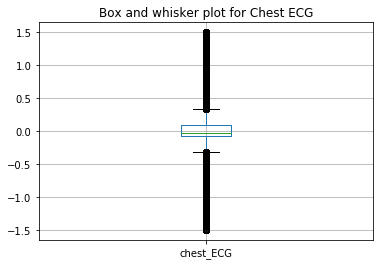

In [69]:
import matplotlib.pyplot as plot

data['chest_ECG'].plot.box(title="Box and whisker plot for Chest ECG", grid=True);

plot.show(block=True);

In [26]:
data['chest_ECG'].corr(data['chest_EMG'])

-0.19077556446848687

In [27]:
a = pd.read_csv(f"{'s2'}.csv")

In [28]:
b = pd.read_csv(f"{'s4'}.csv")
c = pd.read_csv(f"{'s5'}.csv")
d = pd.read_csv(f"{'s6'}.csv")
e = pd.read_csv(f"{'s7'}.csv")
f = pd.read_csv(f"{'s8'}.csv")
g = pd.read_csv(f"{'s9'}.csv")

In [32]:
a['chest_ECG'].mean()

0.001212244628837402

In [36]:
l.append(a['chest_ECG'].mean())
l.append(b['chest_ECG'].mean())
l.append(c['chest_ECG'].mean())
l.append(d['chest_ECG'].mean())
l.append(e['chest_ECG'].mean())
l.append(f['chest_ECG'].mean())
l.append(g['chest_ECG'].mean())
l

k = [23,25,23,27,25,27,28]

In [40]:
data['wrist_BVP'].corr(data['wrist_ACC1'])

-0.0027435565188106427

In [18]:
subject_infos = []
subjects_to_be_calculated = []
for i in range(15):
    subjects_to_be_calculated.append(subjects[i])
for selected_subject in subjects_to_be_calculated:
        data = pd.read_csv(f"{selected_subject}.csv")
        subject_infos.append(data.describe())

for subject, des in zip(subjects, subject_infos):
    display(des)


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06,3.847200e+06
mean,1.923600e+06,1.254331e-03,-2.561529e-03,1.281778e+00,3.477422e+01,5.090375e-02,8.118784e-01,7.224698e-03,-3.253975e-01,7.608313e-04,9.816914e-01,3.344463e+01,4.284742e+01,-1.062733e+00,1.753475e+01,1.429039e+00
std,1.110591e+06,1.497234e-01,1.042374e-02,4.552230e-01,4.796362e-01,3.450750e+00,1.041634e-01,6.156533e-02,2.849468e-01,4.633285e+01,7.689350e-01,9.548704e-01,1.849593e+01,2.194560e+01,3.208093e+01,1.631451e+00
min,0.000000e+00,-1.460220e+00,-1.594391e-01,4.161835e-01,3.365948e+01,-2.693024e+01,4.820000e-01,-4.310000e-01,-1.852000e+00,-6.092300e+02,2.663350e-01,3.081000e+01,-7.400000e+01,-1.280000e+02,-7.500000e+01,0.000000e+00
25%,9.617998e+05,-3.858948e-02,-8.468628e-03,8.674622e-01,3.438724e+01,-2.049255e+00,7.290000e-01,-4.060000e-02,-5.810000e-01,-1.237000e+01,4.172770e-01,3.293000e+01,2.600000e+01,-1.800000e+01,-1.200000e+01,0.000000e+00
50%,1.923600e+06,1.812744e-02,-1.876831e-03,1.001740e+00,3.461252e+01,-2.288818e-01,8.650000e-01,2.380002e-02,-3.080000e-01,2.530000e+00,4.710030e-01,3.368000e+01,4.700000e+01,3.000000e+00,1.200000e+01,1.000000e+00
75%,2.885399e+06,5.461121e-02,3.616333e-03,1.686859e+00,3.526480e+01,2.058411e+00,8.961999e-01,4.180002e-02,-1.350000e-01,1.276000e+01,1.387059e+00,3.418000e+01,5.900000e+01,8.000000e+00,5.300000e+01,2.000000e+00
max,3.847199e+06,1.478714e+00,1.421356e-01,2.257919e+00,3.577805e+01,3.189545e+01,1.476800e+00,4.808000e-01,1.533200e+00,7.796900e+02,3.507541e+00,3.471000e+01,1.270000e+02,8.000000e+01,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06,3.663100e+06
mean,1.831550e+06,1.054395e-03,-3.610395e-03,6.504319e+00,3.468896e+01,5.051829e-02,8.834020e-01,1.275305e-02,-2.218108e-01,4.729311e-03,3.188921e+00,3.284399e+01,-4.430009e+01,-2.492960e+00,9.817465e+00,1.475253e+00
std,1.057446e+06,2.988793e-01,1.317887e-02,4.213099e-01,3.287804e-01,4.815635e+00,2.590039e-02,5.353580e-02,1.100867e-01,4.175769e+01,8.556827e-01,1.166669e+00,2.058645e+01,2.493454e+01,3.320227e+01,1.638622e+00
min,0.000000e+00,-8.789520e-01,-3.598938e-01,5.626297e+00,3.343860e+01,-3.619690e+01,2.977999e-01,-8.262000e-01,-1.547000e+00,-5.619100e+02,1.979115e+00,3.143000e+01,-1.280000e+02,-8.900000e+01,-1.280000e+02,0.000000e+00
25%,9.157748e+05,-1.128387e-01,-1.043701e-02,6.250000e+00,3.454959e+01,-2.073669e+00,8.680000e-01,-1.220000e-02,-2.882000e-01,-8.810000e+00,2.563733e+00,3.167000e+01,-5.900000e+01,-2.000000e+01,-1.400000e+01,0.000000e+00
50%,1.831550e+06,-4.220581e-02,-3.479004e-03,6.392288e+00,3.468933e+01,-7.629395e-02,8.834000e-01,9.400010e-03,-2.406000e-01,1.390000e+00,2.914553e+00,3.250000e+01,-5.100000e+01,-1.000000e+00,1.700000e+01,1.000000e+00
75%,2.747324e+06,3.634644e-02,3.158569e-03,6.624985e+00,3.496799e+01,2.253723e+00,8.980000e-01,4.240000e-02,-1.826000e-01,1.163000e+01,3.474492e+00,3.411000e+01,-3.900000e+01,1.800000e+01,3.800000e+01,3.000000e+00
max,3.663099e+06,1.499954e+00,3.357239e-01,8.166885e+00,3.523850e+01,3.008423e+01,2.037600e+00,4.994000e-01,2.610800e+00,6.301300e+02,6.095525e+00,3.447000e+01,1.080000e+02,1.270000e+02,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06,3.875900e+06
mean,1.937950e+06,1.110787e-03,-3.054032e-03,3.168534e+00,3.402503e+01,5.030855e-02,8.715057e-01,-2.647769e-02,-1.605408e-01,-7.906164e-03,7.108073e+00,3.430634e+01,3.881539e+01,-8.164060e+00,2.201658e+01,1.355788e+00
std,1.118876e+06,2.347629e-01,1.372802e-02,7.650210e-01,3.744222e-01,4.927053e+00,5.372430e-02,9.419907e-02,2.334314e-01,8.933684e+01,3.447478e+00,6.922436e-01,1.912059e+01,2.171088e+01,3.337483e+01,1.575795e+00
min,0.000000e+00,-1.050156e+00,-2.865143e-01,2.026749e+00,3.253012e+01,-3.008270e+01,2.506000e-01,-5.498000e-01,-8.974000e-01,-1.331360e+03,2.841262e+00,3.297000e+01,-1.280000e+02,-1.230000e+02,-1.130000e+02,0.000000e+00
25%,9.689748e+05,-9.040833e-02,-1.002502e-02,2.454758e+00,3.393726e+01,-2.389526e+00,8.451999e-01,-6.260002e-02,-3.494000e-01,-2.838000e+01,4.280477e+00,3.366000e+01,2.300000e+01,-2.200000e+01,-1.000000e+01,0.000000e+00
50%,1.937950e+06,-4.325867e-02,-2.700806e-03,3.025818e+00,3.412909e+01,-2.578735e-01,8.778000e-01,-3.899997e-02,-1.866000e-01,5.050000e+00,6.044355e+00,3.475000e+01,4.000000e+01,-1.100000e+01,2.600000e+01,1.000000e+00
75%,2.906924e+06,2.247620e-02,3.890991e-03,3.544617e+00,3.423438e+01,2.465820e+00,9.082000e-01,1.580000e-02,1.259995e-02,2.907000e+01,8.368125e+00,3.484000e+01,5.700000e+01,2.000000e+00,5.500000e+01,2.000000e+00
max,3.875899e+06,1.499954e+00,4.638519e-01,6.635284e+00,3.486468e+01,3.788605e+01,2.841800e+00,5.197999e-01,9.114000e-01,1.044180e+03,1.592147e+01,3.505000e+01,1.270000e+02,7.100000e+01,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06,3.883600e+06
mean,1.941800e+06,8.416708e-04,-3.091239e-03,2.929618e+00,3.407590e+01,5.090249e-02,7.992011e-01,6.813970e-04,-3.662828e-01,4.479143e-03,3.143948e-01,3.237690e+01,-4.303150e+01,-1.280755e+01,8.485480e+00,1.414024e+00
std,1.121099e+06,3.238797e-01,1.309566e-02,7.868005e-02,3.223034e-01,5.336224e+00,8.831435e-02,7.216065e-02,2.816172e-01,4.239250e+01,2.518874e-02,4.702324e-01,1.485456e+01,3.423804e+01,2.670727e+01,1.646477e+00
min,0.000000e+00,-1.499313e+00,-4.594574e-01,2.466965e+00,3.275290e+01,-3.162689e+01,2.474000e-01,-2.453600e+00,-2.379800e+00,-7.193600e+02,1.269120e-01,3.117000e+01,-1.280000e+02,-9.400000e+01,-1.280000e+02,0.000000e+00
25%,9.708998e+05,-1.246490e-01,-9.384155e-03,2.886581e+00,3.395395e+01,-2.879333e+00,7.162000e-01,-3.880000e-02,-6.036000e-01,-1.736000e+01,3.021700e-01,3.209000e+01,-5.400000e+01,-4.400000e+01,-8.000000e+00,0.000000e+00
50%,1.941800e+06,-4.811096e-02,-2.609253e-03,2.943802e+00,3.414435e+01,-3.875732e-01,7.710000e-01,3.399968e-03,-5.138000e-01,3.630000e+00,3.149620e-01,3.234000e+01,-4.600000e+01,-7.000000e+00,1.000000e+01,1.000000e+00
75%,2.912699e+06,6.816101e-02,3.158569e-03,2.982712e+00,3.428784e+01,2.888489e+00,8.874000e-01,5.460000e-02,-1.490000e-01,1.831000e+01,3.251960e-01,3.275000e+01,-3.200000e+01,5.000000e+00,3.200000e+01,2.000000e+00
max,3.883599e+06,1.499954e+00,3.570099e-01,3.261566e+00,3.498032e+01,3.591461e+01,1.973000e+00,1.249000e+00,1.547400e+00,3.839300e+02,1.033902e+00,3.323000e+01,7.400000e+01,1.270000e+02,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06,3.676400e+06
mean,1.838200e+06,1.106015e-03,-2.721090e-03,2.909373e+00,3.408101e+01,5.503921e-02,8.353326e-01,3.872872e-02,1.381325e-03,6.562912e-03,6.354151e-01,2.998737e+01,4.100706e+01,-1.172718e+01,2.441495e+01,1.464774e+00
std,1.061285e+06,2.885650e-01,1.824004e-02,8.378346e-01,3.465021e-01,4.501873e+00,9.237490e-02,5.190472e-02,3.676107e-01,6.741640e+01,3.646139e-01,3.220329e-01,1.709702e+01,2.053719e+01,2.926091e+01,1.626752e+00
min,0.000000e+00,-1.257111e+00,-3.797150e-01,1.250076e+00,3.301086e+01,-2.219086e+01,2.574000e-01,-6.216000e-01,-2.261400e+00,-1.056420e+03,1.512180e-01,2.897000e+01,-7.000000e+01,-1.280000e+02,-1.240000e+02,0.000000e+00
25%,9.190998e+05,-1.009369e-01,-1.080322e-02,2.148819e+00,3.381567e+01,-2.311707e+00,7.578000e-01,8.999944e-03,-2.194000e-01,-1.055000e+01,3.251960e-01,2.985000e+01,2.700000e+01,-2.400000e+01,0.000000e+00,0.000000e+00
50%,1.838200e+06,-1.826477e-02,-2.334595e-03,3.001404e+00,3.405444e+01,-1.724243e-01,8.864000e-01,2.620006e-02,-1.240000e-01,2.400000e+00,5.439480e-01,3.007000e+01,4.000000e+01,-1.300000e+01,3.200000e+01,1.000000e+00
75%,2.757299e+06,2.069092e-02,5.081177e-03,3.648758e+00,3.440710e+01,2.561951e+00,8.997999e-01,6.060004e-02,1.464000e-01,1.125000e+01,7.921920e-01,3.019000e+01,5.700000e+01,1.000000e+00,5.100000e+01,2.000000e+00
max,3.676399e+06,1.499496e+00,5.009308e-01,4.318237e+00,3.490784e+01,2.875061e+01,2.105000e+00,7.186000e-01,3.706200e+00,1.064000e+03,1.642993e+00,3.053000e+01,1.270000e+02,7.800000e+01,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06,3.941700e+06
mean,1.970850e+06,4.380347e-04,-2.815633e-03,2.143587e+00,3.409520e+01,4.897599e-02,8.955132e-01,-2.715899e-02,-1.243509e-01,1.853769e-03,7.178384e-01,3.043757e+01,3.400182e+01,-4.641997e-01,2.867741e+01,1.382702e+00
std,1.137871e+06,3.553966e-01,1.137731e-02,1.109629e+00,2.527251e-01,3.420964e+00,2.906731e-02,4.842659e-02,1.602525e-01,2.961927e+01,5.723594e-01,5.462074e-01,1.603940e+01,3.550905e+01,2.215084e+01,1.638328e+00
min,0.000000e+00,-1.401169e+00,-2.200470e-01,6.374359e-01,3.328168e+01,-2.528534e+01,2.926000e-01,-4.700000e-01,-3.432800e+00,-4.715100e+02,2.430870e-01,2.933000e+01,-1.160000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00
25%,9.854248e+05,-1.416779e-01,-9.750366e-03,1.169968e+00,3.392355e+01,-2.134705e+00,8.872000e-01,-5.580002e-02,-2.114000e-01,-8.580000e+00,3.851010e-01,2.995000e+01,2.300000e+01,-2.800000e+01,1.400000e+01,0.000000e+00
50%,1.970850e+06,-4.660034e-02,-2.563477e-03,1.977921e+00,3.406354e+01,-2.220154e-01,9.048001e-01,-2.960002e-02,-1.288000e-01,1.410000e+00,4.634110e-01,3.061000e+01,3.700000e+01,5.000000e+00,3.100000e+01,1.000000e+00
75%,2.956274e+06,2.787781e-02,4.302979e-03,2.315521e+00,3.432300e+01,2.362061e+00,9.138000e-01,1.799941e-03,-1.020002e-02,9.270000e+00,8.217140e-01,3.093000e+01,4.700000e+01,1.500000e+01,4.800000e+01,2.000000e+00
max,3.941699e+06,1.499954e+00,1.830597e-01,5.500412e+00,3.471698e+01,1.592407e+01,1.352200e+00,4.038000e-01,2.356200e+00,5.196300e+02,2.656158e+00,3.119000e+01,1.270000e+02,9.600000e+01,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06,4.144000e+06
mean,2.072000e+06,9.653672e-04,-4.100886e-03,6.491610e+00,3.377413e+01,4.705895e-02,6.329243e-01,-1.585921e-02,-5.810792e-01,4.776472e-04,1.081468e+00,3.271068e+01,-4.533356e+01,-5.623962e+00,9.536458e+00,1.302363e+00
std,1.196270e+06,2.861036e-01,1.779375e-02,8.103524e-01,4.235695e-01,4.809081e+00,2.325781e-01,6.002611e-02,3.154529e-01,4.797891e+01,2.482151e-01,4.464129e-01,1.389229e+01,2.753480e+01,3.286755e+01,1.615107e+00
min,0.000000e+00,-1.258484e+00,-9.013367e-01,5.057526e+00,3.210278e+01,-2.802429e+01,1.810000e-01,-6.656000e-01,-1.321400e+00,-7.932400e+02,6.425970e-01,3.183000e+01,-1.280000e+02,-7.900000e+01,-1.280000e+02,0.000000e+00
25%,1.036000e+06,-1.109161e-01,-1.176453e-02,5.738068e+00,3.352933e+01,-2.397156e+00,3.866000e-01,-5.980003e-02,-8.854000e-01,-1.323000e+01,9.343010e-01,3.233000e+01,-5.500000e+01,-2.800000e+01,-8.000000e+00,0.000000e+00
50%,2.072000e+06,-3.996277e-02,-3.890991e-03,6.290817e+00,3.367465e+01,-2.563477e-01,6.470000e-01,-1.800001e-03,-6.830000e-01,1.170000e+00,1.016183e+00,3.265000e+01,-4.600000e+01,-3.000000e+00,6.000000e+00,1.000000e+00
75%,3.107999e+06,1.789856e-02,3.524780e-03,7.224655e+00,3.410620e+01,2.641296e+00,8.778000e-01,2.699995e-02,-2.754000e-01,1.307000e+01,1.092947e+00,3.305000e+01,-3.800000e+01,5.000000e+00,4.000000e+01,2.000000e+00
max,4.143999e+06,1.499954e+00,1.138412e+00,8.211136e+00,3.475540e+01,2.868500e+01,1.859400e+00,5.416000e-01,1.474400e+00,8.339300e+02,2.585791e+00,3.353000e+01,1.250000e+02,1.270000e+02,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06
mean,2.127650e+06,1.212245e-03,-2.412918e-03,1.528387e+00,3.087668e+01,5.490614e-02,7.538656e-01,-1.331884e-01,-4.226812e-01,1.871628e-03,3.931036e-01,3.438764e+01,3.976738e+01,-2.141823e-01,1.898124e+01,1.212370e+00
std,1.228399e+06,1.540773e-01,1.165187e-02,1.238425e+00,1.281106e+00,2.917749e+00,1.751162e-01,6.417297e-02,3.002357e-01,7.536497e+01,3.296540e-01,1.048257e+00,1.948024e+01,3.310736e+01,2.502434e+01,1.606596e+00
min,0.000000e+00,-1.499542e+00,-4.149628e-01,2.632141e-01,2.804526e+01,-2.790375e+01,2.150000e-01,-6.600000e-01,-1.135400e+00,-8.736700e+02,5.152000e-02,3.231000e+01,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00
25%,1.063825e+06,-6.797791e-02,-8.331299e-03,7.995605e-01,3.057495e+01,-1.481628e+00,6.210001e-01,-1.498000e-01,-7.172000e-01,-1.961000e+01,1.694030e-01,3.368000e+01,2.100000e+01,-1.200000e+01,9.000000e+00,0.000000e+00
50%,2.127650e+06,8.239746e-03,-1.602173e-03,1.163101e+00,3.128992e+01,-1.571655e-01,8.568000e-01,-1.256000e-01,-3.222000e-01,3.010000e+00,2.373130e-01,3.423000e+01,4.400000e+01,6.000000e+00,1.700000e+01,0.000000e+00
75%,3.191474e+06,4.435730e-02,3.982544e-03,1.546478e+00,3.181512e+01,1.618958e+00,8.922000e-01,-9.579998e-02,-2.098000e-01,1.900000e+01,5.217690e-01,3.541000e+01,5.700000e+01,2.300000e+01,3.700000e+01,2.000000e+00
max,4.255299e+06,1.499313e+00,3.009796e-01,7.576752e+00,3.437039e+01,2.737885e+01,2.029800e+00,5.390000e-01,1.246800e+00,9.880800e+02,1.717419e+00,3.597000e+01,1.270000e+02,7.200000e+01,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06,4.545100e+06
mean,2.272550e+06,7.934394e-04,-3.431166e-03,7.465800e+00,3.254956e+01,5.399975e-02,8.587684e-01,1.030972e-03,3.270845e-02,5.663528e-04,1.236743e+00,3.177791e+01,-4.535082e+01,2.879074e+00,1.570258e+01,1.216850e+00
std,1.312057e+06,2.960560e-01,3.741806e-02,9.690962e-01,1.522280e+00,3.974090e+00,7.473770e-02,6.996051e-02,3.136732e-01,3.038750e+01,1.648446e+00,9.632978e-01,1.639259e+01,3.042030e+01,2.664207e+01,1.639865e+00
min,0.000000e+00,-1.500000e+00,-1.500000e+00,0.000000e+00,-2.731500e+02,-5.000000e+01,-6.600000e+00,-6.600000e+00,-6.600000e+00,-8.155100e+02,2.923930e-01,3.033000e+01,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00
25%,1.136275e+06,-1.387482e-01,-1.359558e-02,6.957626e+00,3.191290e+01,-2.006531e+00,8.378000e-01,-3.700000e-02,-2.310000e-01,-7.780000e+00,3.807990e-01,3.091000e+01,-5.900000e+01,-1.500000e+01,-5.000000e+00,0.000000e+00
50%,2.272550e+06,-4.243469e-02,-3.158569e-03,7.304382e+00,3.279782e+01,-2.090454e-01,8.638000e-01,-5.400002e-03,1.740003e-02,1.010000e+00,4.704870e-01,3.163000e+01,-4.600000e+01,-1.000000e+00,1.200000e+01,0.000000e+00
75%,3.408824e+06,3.025818e-02,7.003784e-03,7.645035e+00,3.318829e+01,2.281189e+00,9.020000e-01,3.340006e-02,2.946000e-01,7.800000e+00,1.145876e+00,3.277000e+01,-3.600000e+01,1.400000e+01,4.100000e+01,2.000000e+00
max,4.545099e+06,1.499954e+00,1.464340e+00,1.636543e+01,3.452197e+01,1.968689e+01,2.981400e+00,1.322400e+00,4.508200e+00,9.319600e+02,8.792326e+00,3.347000e+01,9.400000e+01,1.270000e+02,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06,4.496100e+06
mean,2.248050e+06,1.239631e-03,-2.288096e-03,2.176569e+00,3.329867e+01,5.629489e-02,7.895819e-01,-2.363781e-01,-3.502788e-01,1.121298e-02,4.770536e-01,3.244155e+01,-4.387321e+01,-2.689873e-01,-7.250368e-01,1.190566e+00
std,1.297912e+06,2.348845e-01,1.419899e-02,1.044990e+00,4.037695e-01,2.481089e+00,1.189924e-01,1.512790e-01,2.406475e-01,7.554696e+01,6.910051e-01,5.608361e-01,1.698388e+01,2.874857e+01,3.415646e+01,1.589549e+00
min,0.000000e+00,-1.499405e+00,-1.958771e-01,9.120941e-01,3.234222e+01,-2.094116e+01,-9.800017e-03,-6.222000e-01,-1.440200e+00,-1.500290e+03,9.876300e-02,3.127000e+01,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00
25%,1.124025e+06,-7.397461e-02,-9.429932e-03,1.363754e+00,3.295676e+01,-1.226807e+00,7.198000e-01,-3.940000e-01,-4.962000e-01,-3.226000e+01,1.524880e-01,3.199000e+01,-6.000000e+01,-1.400000e+01,-2.300000e+01,0.000000e+00
50%,2.248050e+06,-2.467346e-02,-1.968384e-03,1.538467e+00,3.324554e+01,-7.476807e-02,8.062000e-01,-1.942000e-01,-3.800000e-01,5.290000e+00,1.831880e-01,3.273000e+01,-4.600000e+01,-6.000000e+00,4.000000e+00,0.000000e+00
75%,3.372074e+06,8.560181e-03,4.623413e-03,2.666855e+00,3.370496e+01,1.377869e+00,8.958000e-01,-1.156000e-01,-1.704000e-01,3.187000e+01,2.957560e-01,3.291000e+01,-3.200000e+01,4.000000e+00,2.600000e+01,2.000000e+00
max,4.496099e+06,1.499954e+00,3.658905e-01,5.508423e+00,3.409250e+01,2.127533e+01,1.694200e+00,4.690000e-01,1.947000e+00,1.245130e+03,3.119045e+00,3.313000e+01,6.300000e+01,1.270000e+02,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06,4.380600e+06
mean,2.190300e+06,1.120955e-03,-3.707632e-03,7.307906e+00,3.470296e+01,5.555329e-02,8.515734e-01,-4.040461e-02,-1.554191e-01,-8.620394e-04,1.600617e+00,3.356984e+01,4.612785e+01,1.266505e+00,1.735204e+01,1.262384e+00
std,1.264570e+06,2.505791e-01,1.588258e-02,2.320313e+00,2.265897e-01,4.303221e+00,5.836497e-02,3.953232e-02,3.152712e-01,1.254657e+02,9.360954e-01,1.655515e+00,1.546791e+01,2.363601e+01,2.776090e+01,1.633050e+00
min,0.000000e+00,-1.499359e+00,-7.320557e-01,3.402710e+00,3.385062e+01,-2.599030e+01,-1.008600e+00,-1.382600e+00,-4.781400e+00,-1.773760e+03,3.519760e-01,2.961000e+01,-1.210000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00
25%,1.095150e+06,-6.463623e-02,-1.039124e-02,5.461502e+00,3.456802e+01,-2.285767e+00,8.232000e-01,-5.460000e-02,-4.210000e-01,-2.440000e+01,9.390800e-01,3.245000e+01,3.500000e+01,-4.000000e+00,0.000000e+00,0.000000e+00
50%,2.190300e+06,-2.632141e-02,-3.158569e-03,7.151794e+00,3.475540e+01,-4.653931e-01,8.518000e-01,-4.100001e-02,-3.002000e-01,1.910000e+00,1.224383e+00,3.415000e+01,4.900000e+01,4.000000e+00,1.700000e+01,1.000000e+00
75%,3.285449e+06,1.789856e-02,3.524780e-03,9.448624e+00,3.487237e+01,2.394104e+00,9.033999e-01,-2.640003e-02,7.060003e-02,2.817000e+01,1.981717e+00,3.483000e+01,6.000000e+01,1.300000e+01,4.300000e+01,2.000000e+00
max,4.380599e+06,1.499954e+00,3.318329e-01,1.273460e+01,3.546188e+01,3.342896e+01,2.669200e+00,1.609000e+00,4.449000e+00,1.789000e+03,4.738588e+00,3.571000e+01,1.270000e+02,1.270000e+02,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06,4.949700e+06
mean,2.474850e+06,6.865652e-04,-3.929084e-03,8.292531e+00,3.396809e+01,5.261134e-02,7.101258e-01,-5.102462e-02,-4.128740e-01,3.730862e-03,3.343755e+00,3.217980e+01,3.654852e+01,6.559020e+00,3.356096e+01,1.105503e+00
std,1.428855e+06,3.035570e-01,1.791825e-02,1.534487e+00,3.257616e-01,4.119917e+00,1.245003e-01,5.831174e-02,4.362070e-01,4.819964e+01,2.583621e+00,1.218369e+00,2.174124e+01,2.454095e+01,2.050980e+01,1.582562e+00
min,0.000000e+00,-7.138824e-01,-4.449463e-01,5.171204e+00,3.287875e+01,-3.152313e+01,2.490000e-01,-6.728000e-01,-3.468600e+00,-9.626600e+02,1.985030e-01,2.999000e+01,-7.800000e+01,-1.280000e+02,-7.900000e+01,0.000000e+00
25%,1.237425e+06,-9.095764e-02,-1.158142e-02,7.506561e+00,3.372012e+01,-2.288818e+00,5.962000e-01,-8.520001e-02,-7.426000e-01,-1.396000e+01,1.358673e+00,3.115000e+01,2.200000e+01,-8.000000e+00,1.900000e+01,0.000000e+00
50%,2.474850e+06,-2.494812e-02,-3.936768e-03,8.231735e+00,3.398135e+01,-1.205444e-01,7.006000e-01,-4.439998e-02,-6.246000e-01,2.520000e+00,2.460801e+00,3.234000e+01,4.200000e+01,2.000000e+00,3.400000e+01,0.000000e+00
75%,3.712274e+06,2.009583e-02,3.524780e-03,9.099960e+00,3.421146e+01,2.381897e+00,8.290000e-01,-1.639998e-02,-2.286000e-01,1.432000e+01,4.933726e+00,3.297000e+01,5.300000e+01,3.200000e+01,5.500000e+01,2.000000e+00
max,4.949699e+06,1.499954e+00,4.730988e-01,1.225357e+01,3.522610e+01,3.880005e+01,1.844200e+00,5.590000e-01,2.284200e+00,9.899600e+02,9.861891e+00,3.429000e+01,1.270000e+02,1.120000e+02,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06
mean,1.833300e+06,1.303717e-03,-2.024364e-03,1.388318e+01,3.471565e+01,5.685179e-02,8.850791e-01,-3.937164e-02,-1.867314e-01,1.988780e-03,5.232359e+00,3.291430e+01,5.426742e+01,-1.404831e+01,1.319835e+01,1.456092e+00
std,1.058456e+06,2.725119e-01,1.744537e-02,3.252944e+00,2.499805e-01,3.670556e+00,3.847672e-02,3.392035e-02,1.753343e-01,3.700871e+01,1.063394e+00,1.167358e+00,9.442959e+00,1.585023e+01,1.805817e+01,1.638329e+00
min,0.000000e+00,-1.164413e+00,-5.303192e-01,1.098289e+01,3.384149e+01,-4.030457e+01,3.750000e-01,-6.220000e-01,-3.436600e+00,-6.508100e+02,3.686994e+00,2.941000e+01,-6.200000e+01,-1.280000e+02,-1.280000e+02,0.000000e+00
25%,9.166498e+05,-8.244324e-02,-9.567261e-03,1.155930e+01,3.452356e+01,-1.983643e+00,8.522000e-01,-5.699998e-02,-3.458000e-01,-9.790000e+00,4.393051e+00,3.259000e+01,5.100000e+01,-2.300000e+01,0.000000e+00,0.000000e+00
50%,1.833300e+06,-3.071594e-02,-2.151489e-03,1.228828e+01,3.469235e+01,-2.212524e-01,9.006000e-01,-3.539997e-02,-1.806000e-01,1.150000e+00,4.693134e+00,3.311000e+01,5.700000e+01,-1.400000e+01,1.000000e+01,1.000000e+00
75%,2.749949e+06,4.298401e-02,5.630493e-03,1.535759e+01,3.492480e+01,2.229309e+00,9.098001e-01,-2.060002e-02,-1.138000e-01,9.700000e+00,6.183351e+00,3.377000e+01,6.000000e+01,-1.100000e+01,2.400000e+01,2.000000e+00
max,3.666599e+06,1.499496e+00,5.587006e-01,2.241096e+01,3.537338e+01,3.309479e+01,1.796600e+00,4.818000e-01,2.507000e+00,7.165700e+02,8.173678e+00,3.461000e+01,1.270000e+02,8.100000e+01,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06
mean,1.913100e+06,1.477229e-03,-2.612202e-03,3.782816e+00,3.501414e+01,6.716237e-02,8.247114e-01,-8.770056e-02,-2.707233e-01,-1.686370e-03,4.021081e-01,3.291688e+01,3.637526e+01,-1.960910e+00,1.498944e+01,1.412002e+00
std,1.104529e+06,2.663206e-01,1.934570e-02,1.922920e-01,3.112581e-01,3.574538e+00,8.993059e-02,1.343166e-01,2.936610e-01,7.492460e+01,2.174789e-01,6.682203e-01,1.977951e+01,3.172360e+01,3.332183e+01,1.635803e+00
min,0.000000e+00,-1.440353e+00,-1.250198e+00,3.295898e+00,3.363071e+01,-2.435913e+01,-4.734000e-01,-7.758000e-01,-1.798400e+00,-1.385410e+03,2.049470e-01,3.163000e+01,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00
25%,9.565498e+05,-7.704163e-02,-1.002502e-02,3.669357e+00,3.486157e+01,-1.795959e+00,7.802000e-01,-1.796000e-01,-4.914000e-01,-2.467000e+01,2.586750e-01,3.218000e+01,2.700000e+01,-2.900000e+01,-1.200000e+01,0.000000e+00
50%,1.913100e+06,-1.789856e-02,-2.059937e-03,3.759384e+00,3.501737e+01,-7.781982e-02,8.426000e-01,-7.059997e-02,-3.070000e-01,4.470000e+00,2.906560e-01,3.321000e+01,3.900000e+01,2.000000e+00,1.700000e+01,1.000000e+00
75%,2.869649e+06,1.762390e-02,5.081177e-03,3.854752e+00,3.520135e+01,1.976013e+00,8.970000e-01,1.799941e-03,-4.180002e-02,2.506000e+01,4.787060e-01,3.355000e+01,5.000000e+01,1.500000e+01,4.700000e+01,2.000000e+00
max,3.826199e+06,1.499954e+00,1.031433e+00,5.717850e+00,3.577652e+01,2.261353e+01,2.328600e+00,6.408000e-01,2.261800e+00,1.330790e+03,1.282145e+00,3.381000e+01,1.270000e+02,1.270000e+02,1.270000e+02,7.000000e+00


,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label
count,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06,3.656100e+06
mean,1.828050e+06,1.532798e-03,-2.864552e-03,2.768166e+00,3.460153e+01,6.384749e-02,8.163643e-01,-2.747610e-02,-2.947599e-01,1.110952e-03,5.622449e-01,3.269019e+01,3.820481e+01,9.981219e+00,3.184995e+01,1.502968e+00
std,1.055425e+06,2.279383e-01,1.556006e-02,6.799757e-01,3.334515e-01,4.397762e+00,1.226097e-01,8.166216e-02,3.004658e-01,6.051774e+01,2.915077e-01,1.254965e+00,1.669395e+01,2.407236e+01,2.405106e+01,1.675910e+00
min,0.000000e+00,-1.499680e+00,-4.740601e-01,1.320267e+00,3.359134e+01,-4.582672e+01,3.278000e-01,-3.730000e-01,-1.835000e+00,-1.611320e+03,5.527100e-02,3.097000e+01,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00
25%,9.140248e+05,-7.374573e-02,-1.066589e-02,2.200317e+00,3.437039e+01,-2.369690e+00,7.886000e-01,-6.300002e-02,-4.990000e-01,-1.869000e+01,3.865770e-01,3.147000e+01,2.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00
50%,1.828050e+06,-2.838135e-02,-2.243042e-03,2.840424e+00,3.470621e+01,-2.731323e-01,8.570000e-01,-3.179997e-02,-2.674000e-01,3.430000e+00,4.518150e-01,3.268000e+01,3.400000e+01,1.000000e+01,3.600000e+01,1.000000e+00
75%,2.742074e+06,8.857727e-02,5.355835e-03,3.204727e+00,3.487085e+01,2.455139e+00,8.994000e-01,4.999995e-03,-7.859999e-02,1.899000e+01,7.588860e-01,3.381000e+01,5.400000e+01,2.100000e+01,5.400000e+01,3.000000e+00
max,3.656099e+06,1.499954e+00,3.534393e-01,4.241943e+00,3.523074e+01,3.297272e+01,1.966800e+00,3.346000e-01,1.086600e+00,9.708000e+02,1.743949e+00,3.479000e+01,1.270000e+02,1.090000e+02,1.270000e+02,7.000000e+00


In [17]:
subject_infos[0]['chest_ECG']

count    3.847200e+06
mean     1.254331e-03
std      1.497234e-01
min     -1.460220e+00
25%     -3.858948e-02
50%      1.812744e-02
75%      5.461121e-02
max      1.478714e+00
Name: chest_ECG, dtype: float64

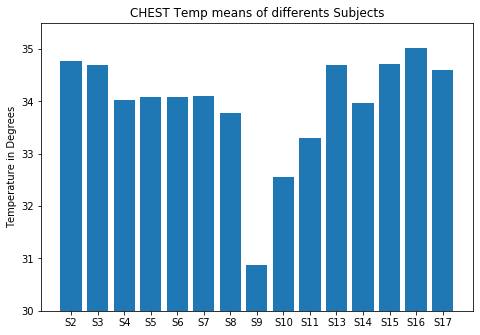

In [73]:
labels = []
for i in range(15):
    if i<10:
        labels.append("S"+str(i+2))
    else:
        labels.append("S"+str(i+3))
means = []
std_dev = []
for i in range(15):
    means.append(subject_infos[i]['chest_Temp']['mean'])
    std_dev.append(subject_infos[i]['chest_ECG']['std'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim([30,35.5])
ax.set_ylabel('Temperature in Degrees')
ax.set_title('CHEST Temp means of differents Subjects')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(labels,means)
plt.show()

In [135]:
selected_subject = subjects[10]
data = pd.read_csv(f"{selected_subject}.csv")

In [136]:
pca = PCA(n_components=2)

In [137]:
data_columns = [
    'chest_ECG', 'chest_EMG', 'chest_EDA', 'chest_Temp',
    'chest_Resp', 'chest_ACC1', 'chest_ACC2', 'chest_ACC3', 'wrist_BVP',
    'wrist_EDA', 'wrist_TEMP', 'wrist_ACC1', 'wrist_ACC2', 'wrist_ACC3']
data_1 = data.copy()
X = data[data_columns]
X = np.array(X)

In [138]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [139]:
pca.explained_variance_ratio_

array([0.90792924, 0.05006512])

In [141]:
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()
finalDf=pd.concat([principalDf,data['label']],axis=1)
finalDf.head()

,principal component 1,principal component 2,label
0,-7.291675,-131.805186,0
1,-7.291674,-131.805956,0
2,-7.291672,-131.804601,0
3,-7.291663,-131.804744,0
4,-7.291672,-131.804569,0


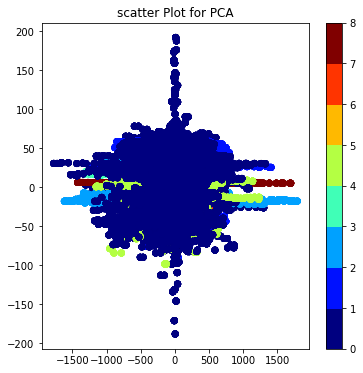

In [62]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
X = finalDf['principal component 1']
Y = finalDf['principal component 2']
N = data['label'].nunique()
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(X,Y,c=finalDf['label'],cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
ax.set_title('scatter Plot for PCA')
plt.show()